<a href="https://colab.research.google.com/github/feliciamargareta/Unsupervised-Learning-K-Means-Clustering/blob/main/Unsupervised_Learning_KMeans_clustering_with_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cluster Grains dataset using K-Means Clustering

In [73]:
# import libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [74]:
# load the data
seeds = pd.read_csv('https://raw.githubusercontent.com/feliciamargareta/Unsupervised-Learning-K-Means-Clustering/main/Grains/seeds.csv')
seeds_det = pd.read_csv('https://raw.githubusercontent.com/feliciamargareta/Unsupervised-Learning-K-Means-Clustering/main/Grains/seeds-width-vs-length.csv')

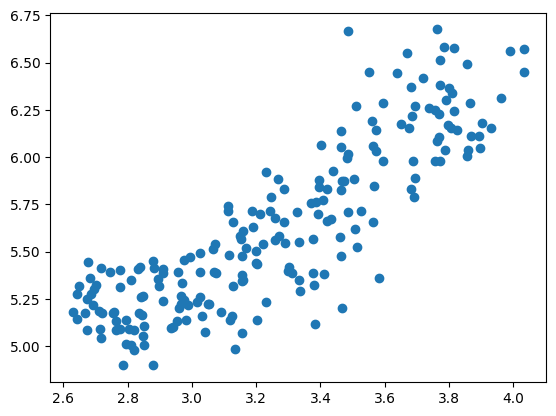

In [75]:
# assign the variable to numpy arrays
seeds_det_arr = seeds_det.values

# plot using 2 feature
plt.scatter(seeds_det_arr[:,0], seeds_det_arr[:,1])
plt.show()

In [76]:
# find the optimal cluster for this grain dataset
ks = range(1,6)
inertias = []

for k in ks:
  #create a KMeans model with k cluster
  model = KMeans(n_clusters = k)
  #fit the model to the data
  model.fit(seeds_det_arr)
  #append the inertia
  inertias.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

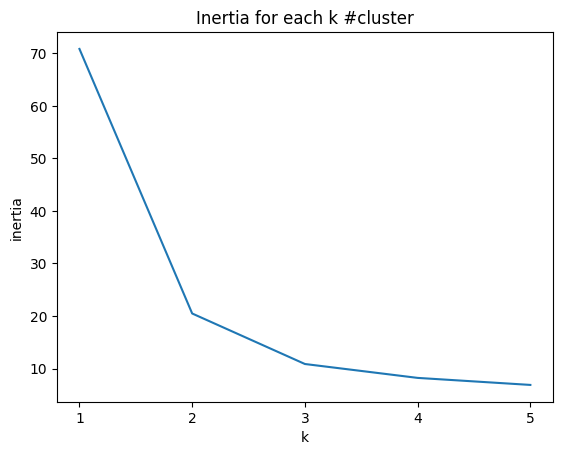

In [77]:
# plot inertia vs k to find the optimal cluster using Elbow method
plt.plot(ks, inertias)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Inertia for each k #cluster')
plt.xticks(ks)
plt.show()

Using the elbow method, the optimal cluster is 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


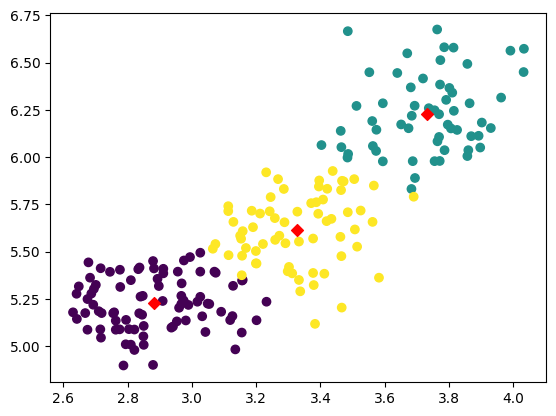

In [78]:
# create KMeans model with 3 cluster
kmeans3 = KMeans(n_clusters=3)
seeds_labels = kmeans3.fit_predict(seeds_det_arr)

# plot using 2 feature with 3 cluster
plt.scatter(seeds_det_arr[:,0], seeds_det_arr[:,1], c= seeds_labels)

# plot the centroids
centroids = kmeans3.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker = 'D', c = 'r')
plt.show()

In [79]:
# compare the KMeans cluster result with the actual group
seeds_vs_df = pd.DataFrame({'seeds_labels':seeds_labels, 'seeds_group': seeds.iloc[:,-1].values})
seeds_ct = pd.crosstab(seeds_vs_df.seeds_labels, seeds_vs_df.seeds_group)
print(seeds_ct)

seeds_group    1   2   3
seeds_labels            
0             16   0  69
1              2  56   0
2             51  14   1


## Visualize the whole iris dataset using T-SNE

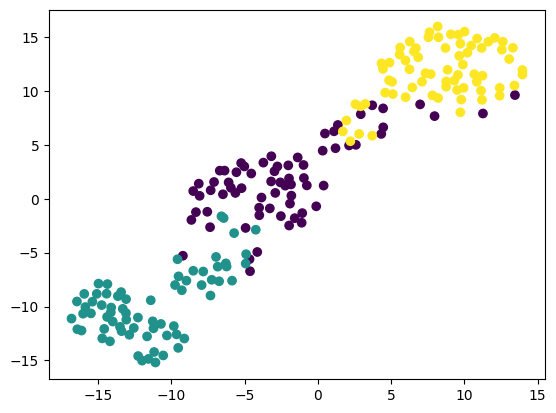

In [80]:
# separate feature and target cluster variable
seeds_fea = seeds.iloc[:,:-1].values
seeds_group = seeds.iloc[:,-1].values

## Map multidimension data to 2D with TSNE

# Create TSNE object
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples
seeds_tsne_fea = model.fit_transform(seeds_fea)

# Scatter plot, coloring by variety_numbers
plt.scatter(seeds_tsne_fea[:,0], seeds_tsne_fea[:,1], c= seeds_group)
plt.show()


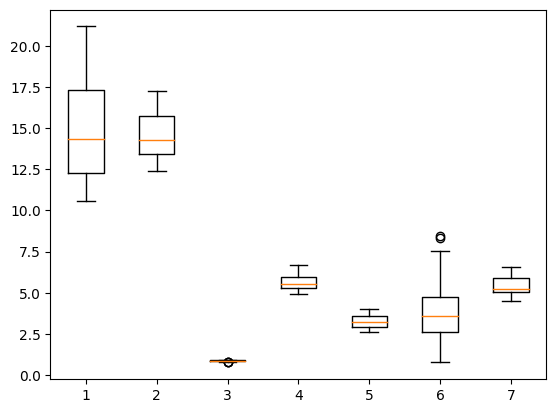

In [81]:
# check the data distribution
plt.boxplot(seeds_fea)
plt.show()

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# create scaler object
scaler = StandardScaler()

# create kmeans object with 3 cluster
kmeans3 = KMeans(n_clusters = 3 )

# combine with a pipeline
pipeline = make_pipeline(scaler, kmeans3)

####
seeds_transformed_labels= pipeline.fit_predict(seeds_fea)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


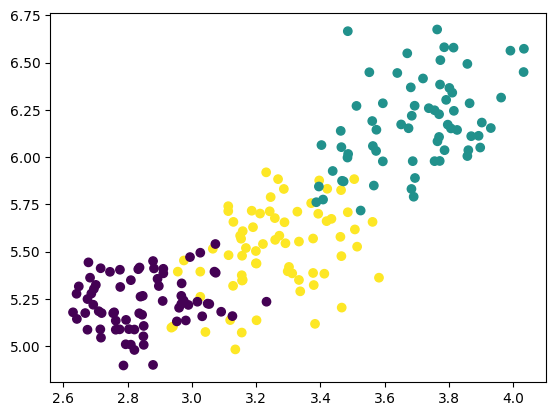

In [83]:
# plot using 2 feature with 3 cluster
plt.scatter(seeds_det_arr[:,0], seeds_det_arr[:,1], c= seeds_transformed_labels)
plt.show()

In [84]:
# compare the KMeans cluster with transformation result with the actual group
seeds_transform_vs_df = pd.DataFrame({'seeds_labels':seeds_labels, 'seeds_transformed_labels':seeds_transformed_labels,'seeds_group': seeds.iloc[:,-1].values})

# crosstab before transformation
seeds_ct = pd.crosstab(seeds_vs_df.seeds_labels, seeds_vs_df.seeds_group)
print(seeds_ct)

# crosstab after transformation
seeds_transformed_ct = pd.crosstab(seeds_transform_vs_df.seeds_transformed_labels, seeds_transform_vs_df.seeds_group)
print(seeds_transformed_ct)

seeds_group    1   2   3
seeds_labels            
0             16   0  69
1              2  56   0
2             51  14   1
seeds_group                1   2   3
seeds_transformed_labels            
0                          6   0  66
1                          2  65   0
2                         61   5   4


# Transforming features for better clusterings

In [85]:
# load the fish data
fish = pd.read_csv('https://raw.githubusercontent.com/feliciamargareta/Unsupervised-Learning-K-Means-Clustering/main/fish.csv')
fish.head()

,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [86]:
# Separate the feature & target variable
fish_features = fish.iloc[:,1:].values
fish_species = fish.iloc[:,0].values

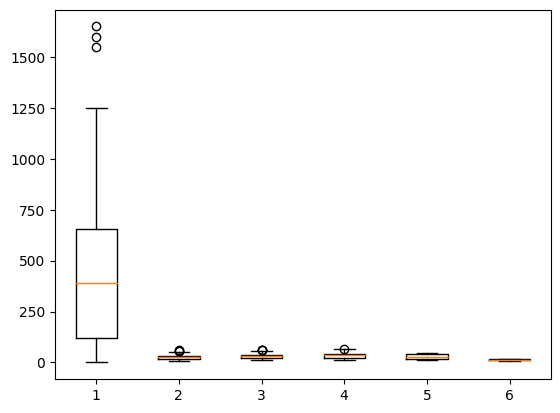

In [87]:
# check the data distribution
plt.boxplot(fish_features)
plt.show()

we can see that the variance of first feature is much higher than other features. that's why it's better for us to transform the data with StandardScaler first before do the clustering

### Scaling fish data for clustering

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the Journal of Statistics Education.

In [88]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

In [89]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

### Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements. Your pipeline is available as pipeline, and the species of every fish sample is given by the list species.

In [90]:
# Fit the pipeline to the samples
pipeline.fit(fish_features)

# calculate the cluster labels
fish_labels = pipeline.predict(fish_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [93]:
# create a df with labels and species as columns
df = pd.DataFrame({'fish_labels':fish_labels, 'species':fish_species})

#create crosstab
ct = pd.crosstab(df.fish_labels, df.species)
print(ct)

species      Bream  Pike  Roach  Smelt
fish_labels                           
0                0     0     19      1
1               33     0      1      0
2                0    17      0      0
3                0     0      0     13


### Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

In [94]:
movements = pd.read_csv('https://raw.githubusercontent.com/feliciamargareta/Unsupervised-Learning-K-Means-Clustering/main/company-stock-movements-2010-2015-incl.csv')
movements_features = movements.iloc[:,1:].values
movements_companies = movements.iloc[:,0].values

In [95]:
# Import Normalizer
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer() #transform the data to have mean 0 and std 1

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

### Which stocks move together?
In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the company names is available.

In [98]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements_features)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': movements_companies})

# Display df sorted by cluster label
print(df.sort_values(by ='labels'))


    labels                           companies
44       0                        Schlumberger
53       0                       Valero Energy
13       0                   DuPont de Nemours
35       0                            Navistar
8        0                         Caterpillar
52       1                            Unilever
46       1                      Sanofi-Aventis
12       1                             Chevron
10       1                      ConocoPhillips
42       1                   Royal Dutch Shell
6        1            British American Tobacco
43       1                                 SAP
37       1                            Novartis
57       1                               Exxon
39       1                              Pfizer
49       1                               Total
19       1                     GlaxoSmithKline
34       2                          Mitsubishi
45       2                                Sony
48       2                              Toyota
21       2   

### Why does movements data need to be normalized?


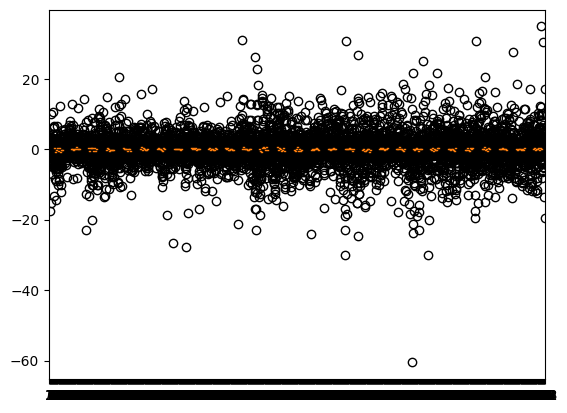

In [101]:
plt.boxplot(movements_features)
plt.show()

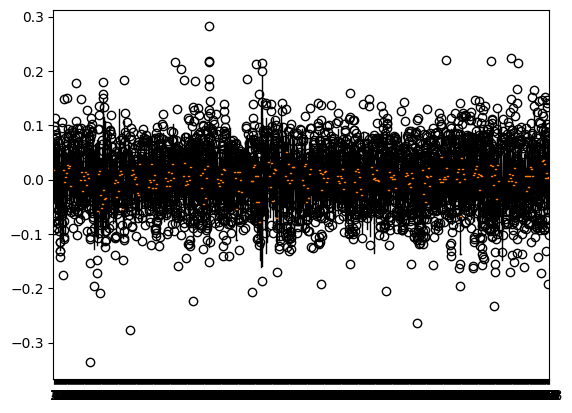

In [102]:
plt.boxplot(normalized_movements)
plt.show()

# **t-SNE visualization of grain dataset**

In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array `samples` of grain samples and a list `variety_numbers` giving the variety number of each grain sample.

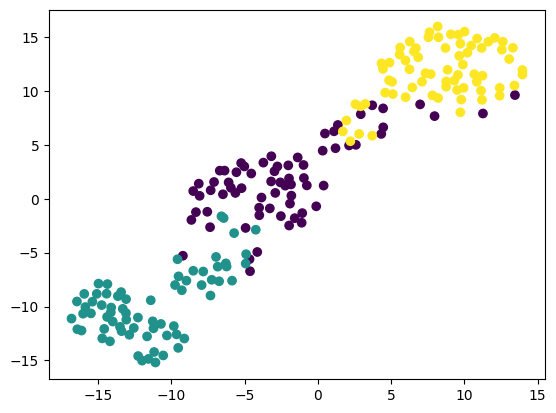

In [99]:
# Import TSNE
from sklearn.manifold import TSNE

# Create TSNE object
model = TSNE(learning_rate = 200)

# Apply fit_transform to samples
seeds_tsne_feature = model.fit_transform(seeds_fea)

# Scatter plot, coloring by variety_numbers
plt.scatter(seeds_tsne_feature[:,0], seeds_tsne_feature[:,1], c= seeds_group)
plt.show()


# **A t-SNE map of the stock market**

t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array `normalized_movements` (these have already been normalized for you). The list `companies` gives the name of each company. PyPlot (`plt`) has been imported for you.

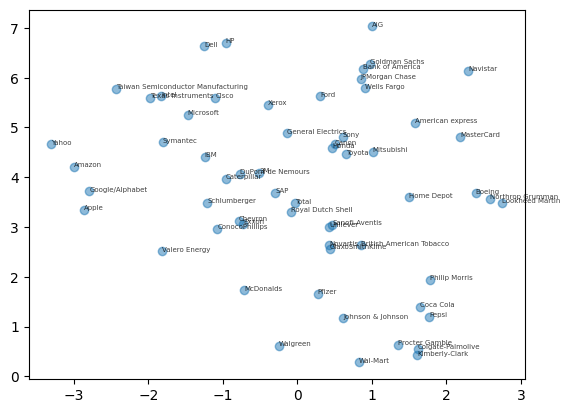

In [100]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate = 50)

normalized_movements = normalizer.fit_transform(movements_features)
# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys, alpha =0.5)

# Annotate the points
for x, y, company in zip(xs, ys, movements_companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()